<a href="https://colab.research.google.com/github/tmckenzieii/team_43/blob/main/Copy_of_Trevor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#from sklearn.linear_model import LinearRegression as lr
from sklearn import linear_model # to make model
import statsmodels.api as sm # to view model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Data sets**

In [2]:
# Loading census data set
food_data = pd.read_csv('https://raw.githubusercontent.com/tmckenzieii/team_43/main/data/food_access.csv')
#df = df.dropna()

In [3]:
# Loading stores data set
store_data = pd.read_csv('https://raw.githubusercontent.com/tmckenzieii/team_43/main/data/grocery_stores_all.csv')

**Cleaning datasets and prepping for merge**

Prepping 'food' census data set

In [4]:
# Create new variable for clean data set and remove NaN values
food_data = food_data.dropna()

# Convert zip code column to string and remove '.0' from ends
food_data['Zip'] = food_data['Zipcode'].astype(str).str.replace(r'.0$', '')

# Create new table for merge with store data from 
food_clean = food_data[['Zip', 'PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN','TractHispanic', 'TractHUNV', 'lapophalf', 'lapop1']]

# Replacing 0s with NaN values to mitigate skewing
food_clean = food_clean.replace({0:np.nan})

# Grouping by zip code with median values
food_merge = food_clean.groupby('Zip').median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Prepping 'stores' data set

In [5]:
# Removing commas from zip code column 
store_data['Zip'] = store_data['ZIP CODE'].str.replace(',','')

# Create clean data set by grouping counts of stores on zip code
store_merge = store_data.groupby('Zip').size().reset_index().rename(columns={0:'Store_Count'})

**Dataframe merging & analysis**

In [6]:
# Final data set for testing
df = food_merge.merge(store_merge, left_on='Zip', right_on='Zip')

Visualizations of column data by zip code

Text(0, 0.5, 'Median Poverty Rate')

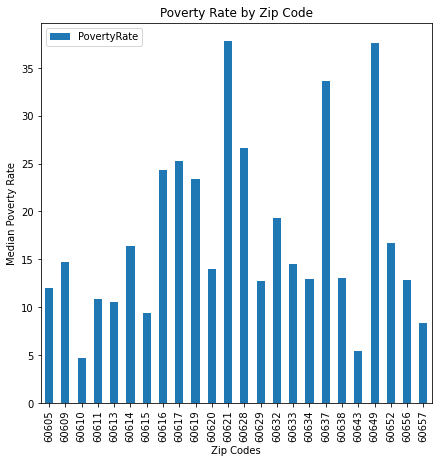

In [7]:
# Bar chart for 'poverty rate' by zip code
zip_pov = df.plot.bar(x='Zip', y='PovertyRate', figsize=(7,7), title='Poverty Rate by Zip Code')
zip_pov.set_xlabel("Zip Codes")
zip_pov.set_ylabel("Median Poverty Rate")

Text(0, 0.5, 'Median Occupied Housing #')

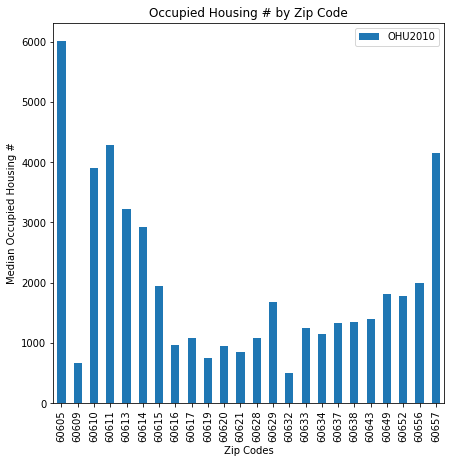

In [8]:
# Bar chart for 'occupied housing unit count in 2010' by zip code
zip_ohu = df.plot.bar(x='Zip', y='OHU2010', figsize=(7,7), title='Occupied Housing # by Zip Code')
zip_ohu.set_xlabel("Zip Codes")
zip_ohu.set_ylabel("Median Occupied Housing #")

Text(0, 0.5, 'Median Family Income')

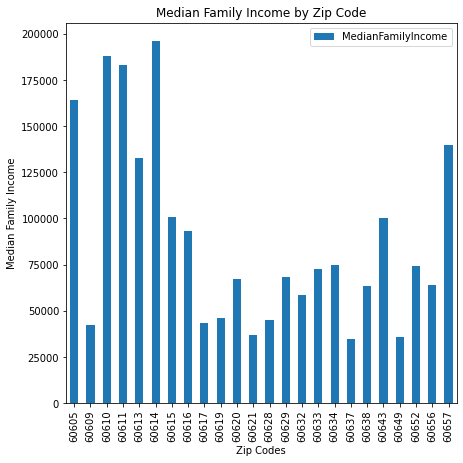

In [9]:
# Bar chart for 'median family income' by zip code
zip_inc = df.plot.bar(x='Zip', y='MedianFamilyIncome', figsize=(7,7), title='Median Family Income by Zip Code')
zip_inc.set_xlabel("Zip Codes")
zip_inc.set_ylabel("Median Family Income")

Text(0, 0.5, 'White Tract Population')

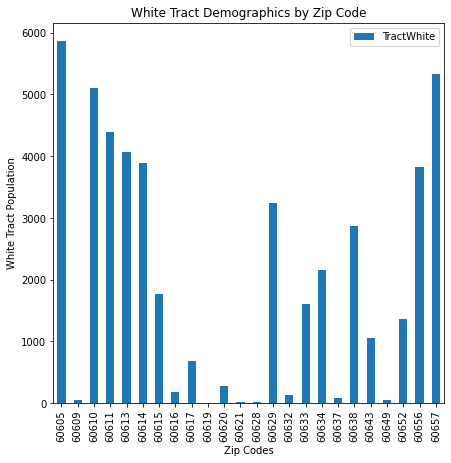

In [10]:
# Bar chart for 'white population in tract' by zip code
zip_wht = df.plot.bar(x='Zip', y='TractWhite', figsize=(7,7), title='White Tract Demographics by Zip Code')
zip_wht.set_xlabel("Zip Codes")
zip_wht.set_ylabel("White Tract Population")

Text(0, 0.5, 'Black Tract Population')

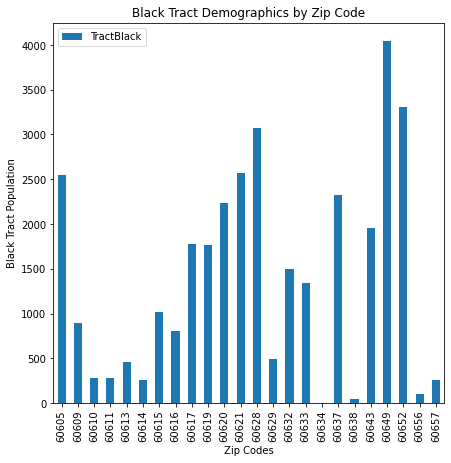

In [11]:
# Bar chart for 'black population in tract' by zip code
zip_blk = df.plot.bar(x='Zip', y='TractBlack', figsize=(7,7), title='Black Tract Demographics by Zip Code')
zip_blk.set_xlabel("Zip Codes")
zip_blk.set_ylabel("Black Tract Population")

Text(0, 0.5, 'Asian Tract Population')

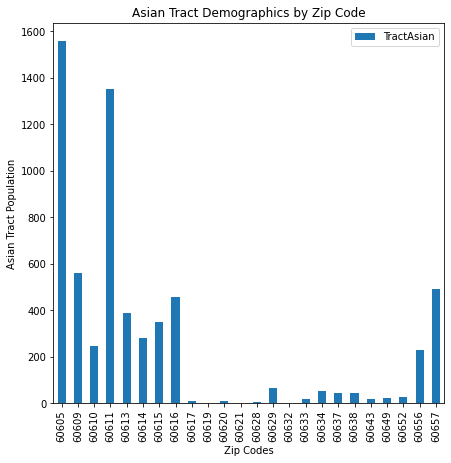

In [12]:
# Bar chart for 'asian population in tract' by zip code
zip_asn = df.plot.bar(x='Zip', y='TractAsian', figsize=(7,7), title='Asian Tract Demographics by Zip Code')
zip_asn.set_xlabel("Zip Codes")
zip_asn.set_ylabel("Asian Tract Population")

Text(0, 0.5, 'Pacific Islander Tract Population')

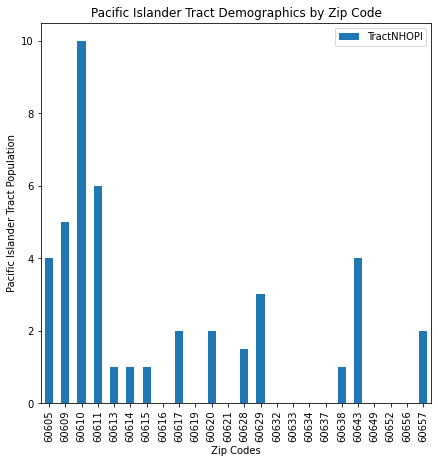

In [13]:
# Bar chart for 'pacific islander population in tract' by zip code
zip_pac = df.plot.bar(x='Zip', y='TractNHOPI', figsize=(7,7), title='Pacific Islander Tract Demographics by Zip Code')
zip_pac.set_xlabel("Zip Codes")
zip_pac.set_ylabel("Pacific Islander Tract Population")

Text(0, 0.5, 'Indigenous American Tract Population')

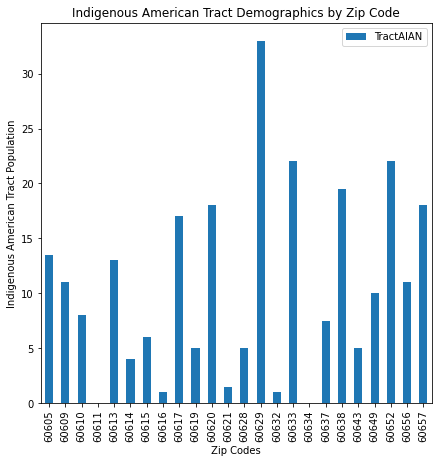

In [14]:
# Bar chart for 'indigenous american population in tract' by zip code
zip_ind = df.plot.bar(x='Zip', y='TractAIAN', figsize=(7,7), title='Indigenous American Tract Demographics by Zip Code')
zip_ind.set_xlabel("Zip Codes")
zip_ind.set_ylabel("Indigenous American Tract Population")

Text(0, 0.5, 'Latino Tract Population')

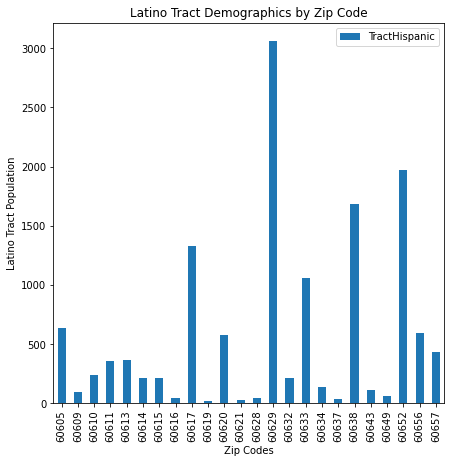

In [15]:
# Bar chart for 'latino population in tract' by zip code
zip_lat = df.plot.bar(x='Zip', y='TractHispanic', figsize=(7,7), title='Latino Tract Demographics by Zip Code')
zip_lat.set_xlabel("Zip Codes")
zip_lat.set_ylabel("Latino Tract Population")

Text(0, 0.5, 'Housing Units')

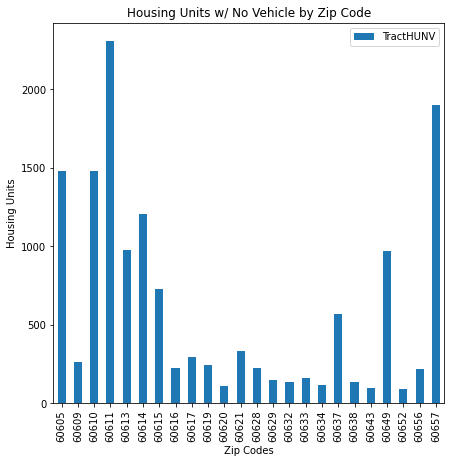

In [16]:
# Bar chart for 'housing units with no vehicle in tract' by zip code
zip_hun = df.plot.bar(x='Zip', y='TractHUNV', figsize=(7,7), title='Housing Units w/ No Vehicle by Zip Code')
zip_hun.set_xlabel("Zip Codes")
zip_hun.set_ylabel("Housing Units")

Text(0, 0.5, 'Population at > 1/2 Mile Distance from Food')

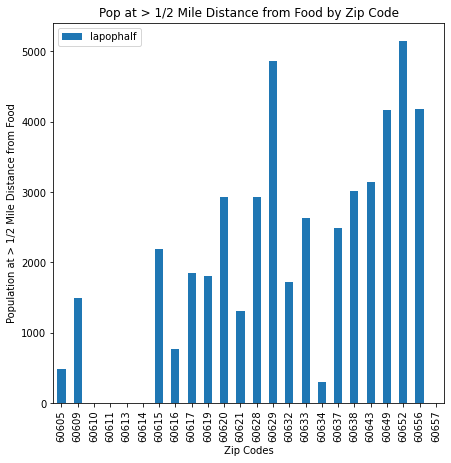

In [17]:
# Bar chart for 'population at > 1/2 mile distance from food in tract' by zip code
zip_hlf = df.plot.bar(x='Zip', y='lapophalf', figsize=(7,7), title='Pop at > 1/2 Mile Distance from Food by Zip Code')
zip_hlf.set_xlabel("Zip Codes")
zip_hlf.set_ylabel("Population at > 1/2 Mile Distance from Food")

Text(0, 0.5, 'Population at > 1 Mile Distance from Food')

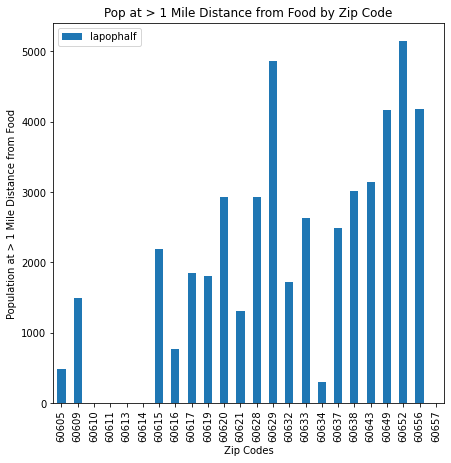

In [18]:
# Bar chart for 'population at > 1 mile distance from food in tract' by zip code
zip_1ml = df.plot.bar(x='Zip', y='lapophalf', figsize=(7,7), title='Pop at > 1 Mile Distance from Food by Zip Code')
zip_1ml.set_xlabel("Zip Codes")
zip_1ml.set_ylabel("Population at > 1 Mile Distance from Food")

Text(0, 0.5, 'Grocery Store/Super Market #')

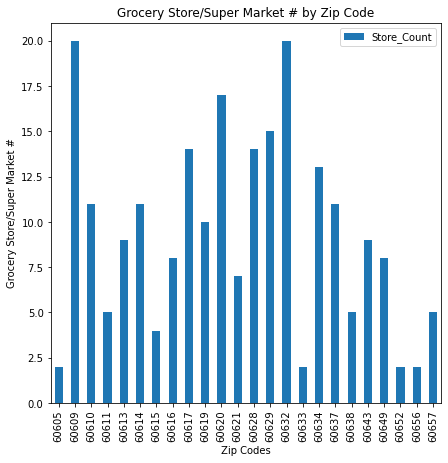

In [19]:
# Bar chart for 'store count' by zip code
zip_gro = df.plot.bar(x='Zip', y='Store_Count', figsize=(7,7), title='Grocery Store/Super Market # by Zip Code')
zip_gro.set_xlabel("Zip Codes")
zip_gro.set_ylabel("Grocery Store/Super Market #")

Text(0.5, 0, 'Cook County Zipcodes')

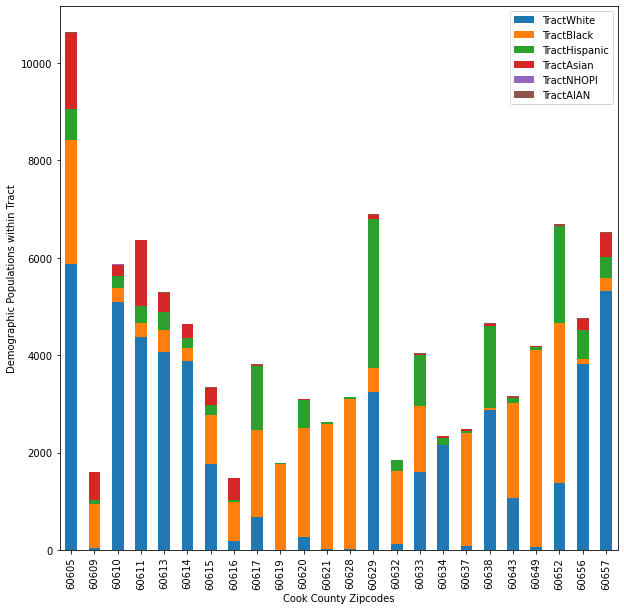

In [20]:
stack_bar = df[['Zip', 'TractWhite', 'TractBlack', 'TractHispanic', 'TractAsian', 'TractNHOPI', 'TractAIAN']].plot(x='Zip', kind='bar', stacked=True, rot= 90, figsize=(10, 10))
stack_bar.set_ylabel('Demographic Populations within Tract')
stack_bar.set_xlabel('Cook County Zipcodes')

Correlation matrix

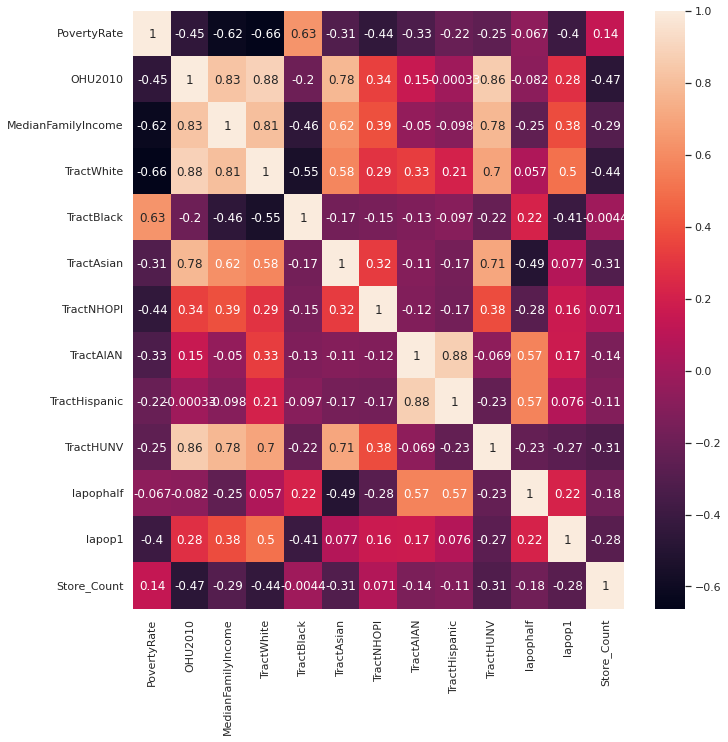

In [21]:
# Variable for correlation matrix
corr_mat = df.corr()

# Setting figure size for readability
sns.set(rc = {'figure.figsize':(11,11)})

# Heat map of correlation matrix
sns.heatmap(corr_mat, annot=True) # nothing is alarmingly high so no preemptive removals

Column data distributions

Text(0, 0.5, 'Frequency')

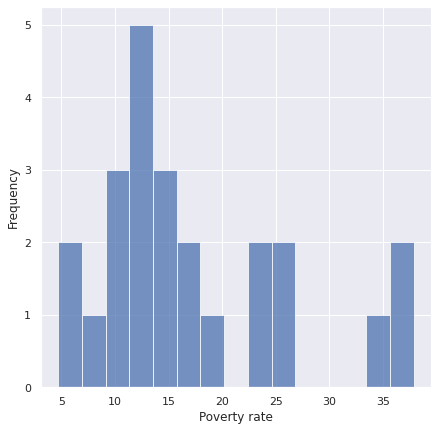

In [22]:
# Histogram of poverty rate
pr_hist = df['PovertyRate'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Poverty rate')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

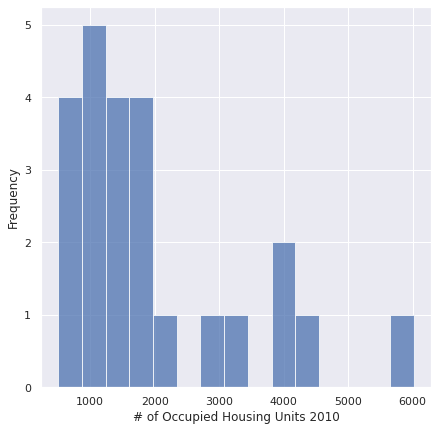

In [23]:
# Histogram of # of occupied housing units in 2010 census
pr_hist = df['OHU2010'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('# of Occupied Housing Units 2010')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

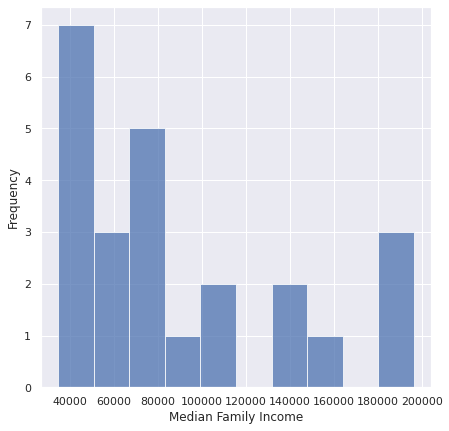

In [24]:
# Histogram of median family income
pr_hist = df['MedianFamilyIncome'].plot.hist(bins=10, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Median Family Income')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

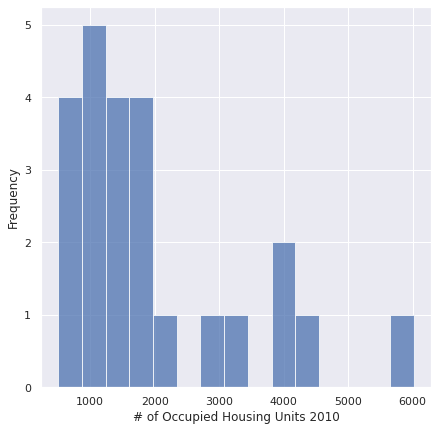

In [25]:
# Histogram of # of occupied housing units in 2010 census
pr_hist = df['OHU2010'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('# of Occupied Housing Units 2010')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

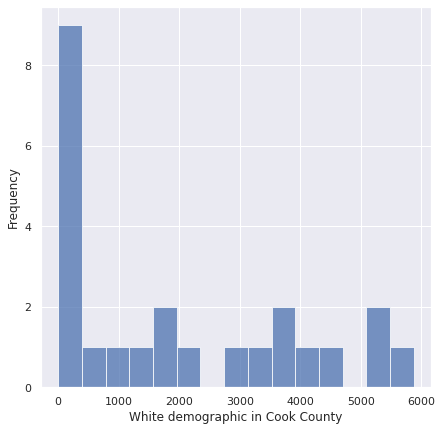

In [26]:
# Histogram of 'white' demographic count
pr_hist = df['TractWhite'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('White demographic in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

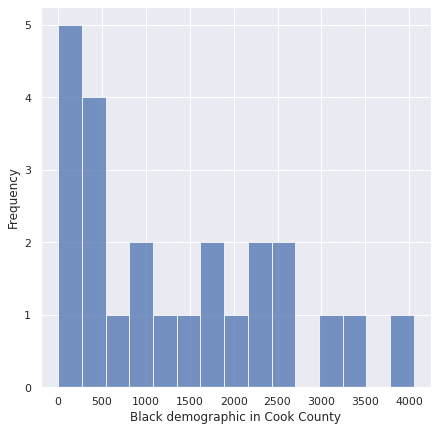

In [27]:
# Histogram of 'black' demographic count
pr_hist = df['TractBlack'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Black demographic in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

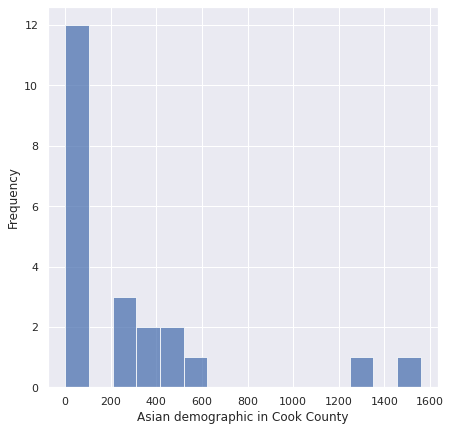

In [28]:
# Histogram of 'Asian' demographic count
pr_hist = df['TractAsian'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Asian demographic in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

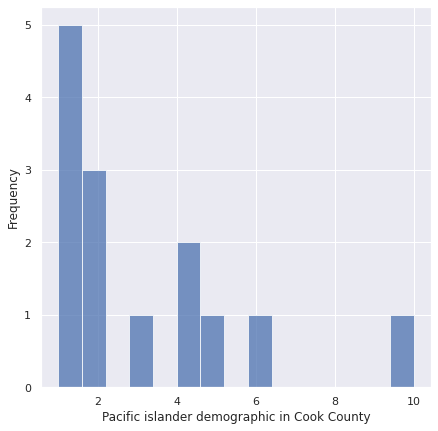

In [29]:
# Histogram of 'native Hawaiian and other Pacific islander' demographic count
pr_hist = df['TractNHOPI'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Pacific islander demographic in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

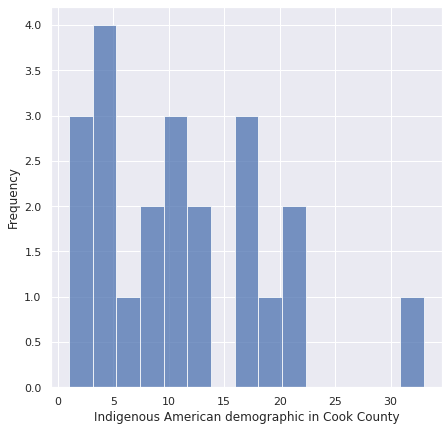

In [30]:
# Histogram of 'indigenous American' demographic count
pr_hist = df['TractAIAN'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Indigenous American demographic in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

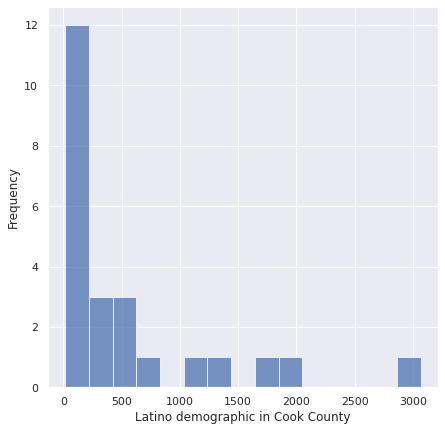

In [31]:
# Histogram of 'Latino' demographic count
pr_hist = df['TractHispanic'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Latino demographic in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

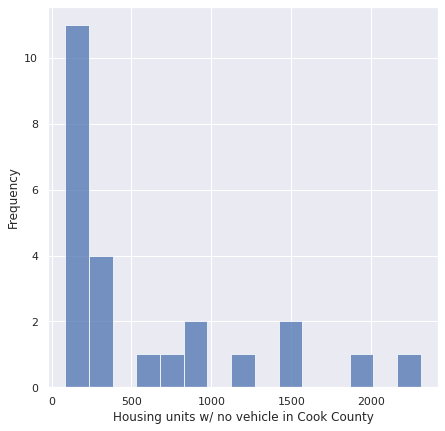

In [32]:
# Histogram of 'tract housing units withhout a vehicle' 
pr_hist = df['TractHUNV'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Housing units w/ no vehicle in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

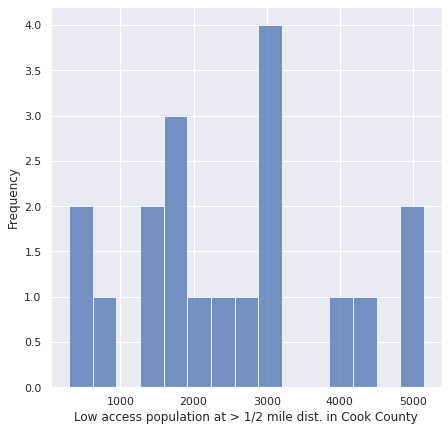

In [33]:
# Histogram of 'low access population at > 1/2 mile' 
pr_hist = df['lapophalf'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Low access population at > 1/2 mile dist. in Cook County')
pr_hist.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

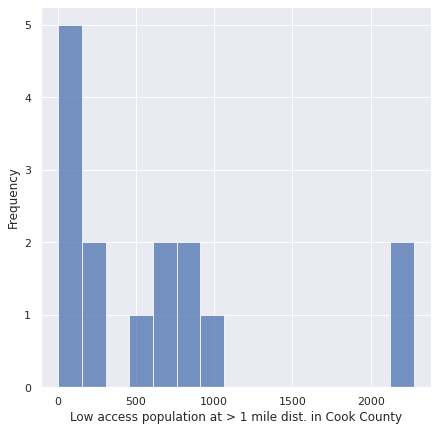

In [34]:
# Histogram of 'low access population at > 1 mile distance'  
pr_hist = df['lapop1'].plot.hist(bins=15, alpha=.75, figsize=(7,7))
pr_hist.set_xlabel('Low access population at > 1 mile dist. in Cook County')
pr_hist.set_ylabel('Frequency')

**Multiple linear regression**

In [35]:
# Changing NaNs back to 0s to mitigate regression-based errors
df_reg = df.replace({np.nan:0})

Setting variables

In [36]:
# Independent variables for 'stores' regression
x_stores = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN','TractHispanic', 'TractHUNV', 'lapophalf', 'lapop1']]

# Dependent variable for 'stores' regression
y_stores = df_reg['Store_Count']

Modeling, summary stats and finding best fit

In [37]:
# Initial model iteration
model = sm.OLS(y_stores, x_stores).fit()
print(model.summary()) # Everything but 'PovertyRate' has a p-value > .05

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              5.778
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                     0.00244
Time:                        22:58:40   Log-Likelihood:                         -68.134
No. Observations:                  24   AIC:                                      160.3
Df Residuals:                      12   BIC:                                      174.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [38]:
# Removing 'TractHUNV' - highest to p-value
x_stores2 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN','TractHispanic', 'lapophalf', 'lapop1']]

# Model iteration
model2 = sm.OLS(y_stores, x_stores2).fit()
print(model2.summary()) # Multiple p-values changed - 'lapophalf' has highest p-value

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              6.773
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    0.000911
Time:                        22:58:40   Log-Likelihood:                         -68.217
No. Observations:                  24   AIC:                                      158.4
Df Residuals:                      13   BIC:                                      171.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [39]:
# Removing 'lapophalf' - highest to p-value
x_stores3 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN','TractHispanic', 'lapop1']]

# Model iteration
model3 = sm.OLS(y_stores, x_stores3).fit()
print(model3.summary()) # Multiple p-values changed - 'TractBlack' has highest p-value

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              7.914
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    0.000326
Time:                        22:58:40   Log-Likelihood:                         -68.357
No. Observations:                  24   AIC:                                      156.7
Df Residuals:                      14   BIC:                                      168.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [40]:
# Removing 'TractBlack' - highest to p-value
x_stores4 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractWhite', 'TractAsian', 'TractNHOPI',
       'TractAIAN','TractHispanic', 'lapop1']]

# Model iteration
model4 = sm.OLS(y_stores, x_stores4).fit()
print(model4.summary()) # Multiple p-values changed - 'lapop1' has highest p-value

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              9.161
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    0.000118
Time:                        22:58:40   Log-Likelihood:                         -68.642
No. Observations:                  24   AIC:                                      155.3
Df Residuals:                      15   BIC:                                      165.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [41]:
# Removing 'lapop1' - highest to p-value
x_stores5 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractWhite', 'TractAsian', 'TractNHOPI',
       'TractAIAN','TractHispanic']]

# Model iteration
model5 = sm.OLS(y_stores, x_stores5).fit()
print(model5.summary()) # Multiple p-values changed - 'TractWhite' has highest p-value

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              10.84
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    3.67e-05
Time:                        22:58:41   Log-Likelihood:                         -68.788
No. Observations:                  24   AIC:                                      153.6
Df Residuals:                      16   BIC:                                      163.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [42]:
# Removing 'TractWhite' - highest to p-value
x_stores6 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractAsian', 'TractNHOPI',
       'TractAIAN','TractHispanic']]

# Model iteration
model6 = sm.OLS(y_stores, x_stores6).fit()
print(model6.summary()) # Multiple p-values changed - 'TractAsian' has highest p-value

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              12.82
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    1.13e-05
Time:                        22:58:41   Log-Likelihood:                         -69.049
No. Observations:                  24   AIC:                                      152.1
Df Residuals:                      17   BIC:                                      160.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [43]:
# Removing 'TractAsian' - highest to p-value
x_stores7 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractNHOPI',
       'TractAIAN','TractHispanic']]

# Model iteration
model7 = sm.OLS(y_stores, x_stores7).fit()
print(model7.summary()) # Multiple p-values changed - 'TractHispanic' has highest p-value

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              15.61
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    2.96e-06
Time:                        22:58:41   Log-Likelihood:                         -69.199
No. Observations:                  24   AIC:                                      150.4
Df Residuals:                      18   BIC:                                      157.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [44]:
# Removing 'TractHispanic' - highest to p-value
x_stores8 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractNHOPI',
       'TractAIAN']]

# Model iteration
model8 = sm.OLS(y_stores, x_stores8).fit()
print(model8.summary()) # Multiple p-values changed - 'TractAIAN' has highest p-value

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                              19.00
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    8.40e-07
Time:                        22:58:41   Log-Likelihood:                         -69.597
No. Observations:                  24   AIC:                                      149.2
Df Residuals:                      19   BIC:                                      155.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [45]:
# Removing 'TractAIAN' - highest to p-value
x_stores9 = df_reg[['PovertyRate', 'OHU2010', 'MedianFamilyIncome', 'TractNHOPI']]

# Model iteration
model9 = sm.OLS(y_stores, x_stores9).fit()
print(model9.summary()) # No p-values > 0.5, lowest BIC, highest R-squared & adj. r-squared (tried removing 'NHOPI)

                                 OLS Regression Results                                
Dep. Variable:            Store_Count   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                              22.01
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                    4.33e-07
Time:                        22:58:41   Log-Likelihood:                         -70.859
No. Observations:                  24   AIC:                                      149.7
Df Residuals:                      20   BIC:                                      154.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [46]:
regr_final = linear_model.LinearRegression()

regr_final.fit(x_stores9.values, y_stores.values)

predicted_stores = regr_final.predict([[15, 1000, 45000, 100]])

print(predicted_stores)

[130.2881437]


**Explanation**


Hypothesis: There is a relationship between census data and number of stores per zipcode.

Findings:
1.   Adjusted R-Squared indicates that 77.8% of variance is explained by model
2.   F-statistic indicates (absurdly) high significance
3.   Prob(F) or p-value < .05 (good) 
4.   BIC is 154.4, down from 174.4 in the first model (good)
5.   No independent variables have a p-value > .05
6.   The model appears to be fitting and functional

